In [12]:
from pathlib import Path
import dask.array as da
from collections import defaultdict
import zarr
import json
from tqdm.auto import tqdm
import os, glob
from natsort import natsorted

In [17]:
root_dir = Path("/mnt/DATA3/BPP0050")

exclude_path = root_dir / "BPP0050-1-Live-cell-to4i_Fixed_Cy1__2025-04-14T16_57_11-Measurement 1"

def extract_cy_key(p):
    name = p.name
    for part in name.split('_'):
        if part.startswith("Cy"):
            return part  # e.g. 'Cy1', 'Cy10', etc.
    return ""

iteration_dirs = [
    p for p in root_dir.glob("*Fixed*/")
    if p != exclude_path
]

# Natural sort by Cy* label
iteration_dirs = natsorted(iteration_dirs, key=extract_cy_key)


In [18]:
iteration_dirs

[PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy1-2__2025-04-14T18_24_32-Measurement 1'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy2__2025-04-15T16_42_33-Measurement 3'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy3__2025-04-16T16_15_21-Measurement 1'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy4__2025-04-17T16_24_52-Measurement 1'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy5__2025-04-18T16_38_51-Measurement 1'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy6__2025-04-19T16_14_26-Measurement 1'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy7__2025-04-20T16_03_17-Measurement 1'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy8__2025-04-21T16_49_44-Measurement 1'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy9__2025-04-22T18_25_01-Measurement 1'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_

In [19]:
# Paths
root_dir = Path("/mnt/DATA3/BPP0050")
output_dir = root_dir / "multiplexed"
output_dir.mkdir(exist_ok=True)

# Collect all position-staining image paths
pos_dict = defaultdict(list)

for iter_dir in tqdm(iteration_dirs):
    zarr_root = iter_dir / "acquisition/zarr"
    for pos_zarr in zarr_root.glob("*.zarr"):
        pos_id = pos_zarr.stem  # e.g., '(2, 4)'
        img_path = pos_zarr / "images"
        if img_path.exists():
            pos_dict[pos_id].append(img_path)

# Stack across staining rounds for each position
for pos_id, img_paths in tqdm(pos_dict.items(), total =len(pos_dict.items())):
    arrays = [da.from_zarr(p) for p in sorted(img_paths)]
    stacked = da.stack(arrays, axis=0)  # axis 0 is staining round (S)

    # Normalize pos_id for file naming: "(2, 4)" → "2_4"
    pos_name = pos_id.strip("()").replace(", ", "_")
    out_path = output_dir / f"{pos_name}_plexed.zarr"
    stacked.to_zarr(out_path, overwrite=True)


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

In [119]:
img_paths

[PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy1-2__2025-04-14T18_24_32-Measurement 1/acquisition/zarr/(5, 5).zarr/images'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy2__2025-04-15T16_42_33-Measurement 3/acquisition/zarr/(5, 5).zarr/images'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy3__2025-04-16T16_15_21-Measurement 1/acquisition/zarr/(5, 5).zarr/images'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy4__2025-04-17T16_24_52-Measurement 1/acquisition/zarr/(5, 5).zarr/images'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy5__2025-04-18T16_38_51-Measurement 1/acquisition/zarr/(5, 5).zarr/images'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy6__2025-04-19T16_14_26-Measurement 1/acquisition/zarr/(5, 5).zarr/images'),
 PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy7__2025-04-20T16_03_17-Measurement 1/acquisition/zarr/(5, 5).zarr/images'),
 PosixPath('/mnt/D

In [118]:
pos_dict

defaultdict(list,
            {'(2, 4)': [PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy1-2__2025-04-14T18_24_32-Measurement 1/acquisition/zarr/(2, 4).zarr/images'),
              PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy2__2025-04-15T16_42_33-Measurement 3/acquisition/zarr/(2, 4).zarr/images'),
              PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy3__2025-04-16T16_15_21-Measurement 1/acquisition/zarr/(2, 4).zarr/images'),
              PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy4__2025-04-17T16_24_52-Measurement 1/acquisition/zarr/(2, 4).zarr/images'),
              PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy5__2025-04-18T16_38_51-Measurement 1/acquisition/zarr/(2, 4).zarr/images'),
              PosixPath('/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy6__2025-04-19T16_14_26-Measurement 1/acquisition/zarr/(2, 4).zarr/images'),
              PosixPath('/mnt/DATA3/BPP0050/BPP0050-


### load registration stack

In [21]:
import napari

In [33]:
%%time
fixed_cycles = stacked.max(axis=3).compute()

CPU times: user 40.3 s, sys: 1min 32s, total: 2min 12s
Wall time: 2min 12s


In [34]:
viewer = napari.Viewer(title = 'multiplex stacks')
viewer.add_image(fixed_cycles, channel_axis = 2)

[<Image layer 'Image' at 0x7ff3434979a0>,
 <Image layer 'Image [1]' at 0x7ff3434d7370>,
 <Image layer 'Image [2]' at 0x7ff342302c20>,
 <Image layer 'Image [3]' at 0x7ff35ddc05e0>]

In [47]:
reg_zarr = '/mnt/DATA3/BPP0050/BPP0050-1-Live-cell-to4i_Fixed_Cy1__2025-04-14T16_57_11-Measurement 1/acquisition/zarr/(5, 5).zarr'

In [48]:
zarr_group = zarr.open_group(reg_zarr)

In [49]:
zarr_group.labels.segmentation

<zarr.core.Array '/labels/segmentation' (6911, 6911) uint16>

In [50]:
zarr_group.images

<zarr.core.Array '/images' (1, 6, 3, 6911, 6911) uint16>

In [72]:
registration = zarr_group.images[:].max(axis=2)

In [73]:
registration.shape

(1, 6, 6911, 6911)

In [75]:
viewer.add_image(registration, channel_axis=1)

[<Image layer 'Image [4]' at 0x7ff331865a20>,
 <Image layer 'Image [5]' at 0x7ff331864be0>,
 <Image layer 'Image [6]' at 0x7ff33132a1d0>,
 <Image layer 'Image [7]' at 0x7ff330160fd0>,
 <Image layer 'Image [8]' at 0x7ff35df7b430>,
 <Image layer 'Image [9]' at 0x7ff331c418d0>]

In [56]:
segmentation = zarr_group.labels.segmentation[:]
segmentation.shape

(6911, 6911)

In [57]:
viewer.add_labels(segmentation)

<Labels layer 'segmentation' at 0x7ff31dea9360>

### Calculating shift between images

In [76]:
fixed_cycles.shape

(17, 1, 4, 6911, 6911)

In [77]:
registration[:,-1,...].shape

(1, 6911, 6911)

In [88]:
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift as ndi_shift
import numpy as np

In [84]:
dapi_reference_img.shape

(1, 6911, 6911)

In [104]:
dapi_cycle_img.shape, dapi_reference_img.shape

((6911, 6911), (6911, 6911))

In [107]:
viewer.add_image(dapi_cycle_img)
viewer.add_image(dapi_reference_img)

<Image layer 'dapi_reference_img' at 0x7ff337baca60>

In [109]:
from skimage.exposure import rescale_intensity

ref = rescale_intensity(dapi_reference_img, in_range='image', out_range=(0, 1))
cyc = rescale_intensity(dapi_cycle_img, in_range='image', out_range=(0, 1))


In [110]:
shift, error, phasediff = phase_cross_correlation(ref, cyc, upsample_factor=10)
print(shift)

[-0.4  0.4]


In [113]:
def center_crop(img, size=2048):
    y, x = img.shape
    y0 = y//2 - size//2
    x0 = x//2 - size//2
    return img[y0:y0+size, x0:x0+size]

ref_crop = center_crop(dapi_reference_img)
cyc_crop = center_crop(dapi_cycle_img)
shift, error, phasediff = phase_cross_correlation(ref_crop, cyc_crop, upsample_factor=10)
print(shift)

[-0.1  0. ]


In [114]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(dapi_reference_img)
mask = dapi_reference_img > thresh

ref_masked = dapi_reference_img * mask
cyc_masked = dapi_cycle_img * mask

shift, error, phasediff = phase_cross_correlation(ref_masked, cyc_masked, upsample_factor=10)
print(shift)

[0. 0.]


In [116]:
viewer.add_image(ref_masked)
viewer.add_image(cyc_masked)

<Image layer 'cyc_masked' at 0x7ff330daaa10>

In [117]:
for up in [1, 2, 5, 10, 20]:
    shift, error, _ = phase_cross_correlation(ref_crop, cyc_crop, upsample_factor=up)
    print(f"Upsample {up}: shift={shift}, error={error}")

Upsample 1: shift=[0. 0.], error=1.0
Upsample 2: shift=[0. 0.], error=1.0
Upsample 5: shift=[0. 0.], error=1.0
Upsample 10: shift=[-0.1  0. ], error=1.0
Upsample 20: shift=[-0.05  0.  ], error=1.0


In [124]:
dapi_cycle_img = fixed_cycles[-1,0,-1,...]

In [140]:
dapi_cycle_img.shape

(6911, 6911)

In [141]:
aligned_cycles = []

dapi_reference_img = registration[0, -1, 0:800,0:800]
ref_masked, flows, styles = cellpose_model.eval(dapi_reference_img,)    
for i, cycle in tqdm(enumerate(fixed_cycles), total=len(fixed_cycles)):
    dapi_cycle_img = cycle[0, -1,  0:800,0:800]
    
    cyc_masked, flows, styles = cellpose_model.eval(dapi_cycle_img,)    
    
    shift, error, phasediff = phase_cross_correlation(ref_masked, cyc_masked, upsample_factor=10)
    
    print(shift)
    # Apply shift to all channels in this cycle
    shifted = np.stack([
        ndi_shift(cycle[0, c, ...], shift, order=1, mode='constant')
        for c in range(cycle.shape[1])
    ], axis=0) 

    aligned_cycles.append(shifted)
    
aligned_cycles = np.stack(aligned_cycles, axis=0)

  0%|          | 0/17 [00:00<?, ?it/s]

[-3.7  0.4]
[ 2.8 -3.8]
[15.  -5.1]
[12.   2.9]
[ -15. -263.]
[  3.7 -16.9]
[19.   1.2]
[10.6 -6.3]
[99.5 74. ]
[43.4 30.2]
[71.6 51.6]
[7.3 5.1]
[ 6.8 -0.7]
[4.1 1.9]
[-2.4 -2. ]
[9.2 2. ]
[10.5  1. ]


In [142]:
aligned_cycles.shape

(17, 4, 6911, 6911)

In [143]:
viewer = napari.Viewer(title = 'visualising_shift')
viewer.add_image(aligned_cycles, channel_axis=1)

[<Image layer 'Image' at 0x7ff31dd3d0c0>,
 <Image layer 'Image [1]' at 0x7ff321c15120>,
 <Image layer 'Image [2]' at 0x7ff321bea4d0>,
 <Image layer 'Image [3]' at 0x7ff321d0e200>]

In [144]:
viewer.add_labels(segmentation)

<Labels layer 'segmentation' at 0x7ff3231acf70>

In [139]:
aligned_cycles = []

dapi_reference_img = registration[0, -1, ...] 
ref_masked, flows, styles = cellpose_model.eval(dapi_reference_img[,)    
for i, cycle in tqdm(enumerate(fixed_cycles), total=len(fixed_cycles)):
    dapi_cycle_img = cycle[0, -1, ...]
    


    cyc_masked, flows, styles = cellpose_model.eval(dapi_cycle_img,)    
    
    shift, error, phasediff = phase_cross_correlation(ref_masked, cyc_masked, upsample_factor=10)
    
    print(shift)
    # Apply shift to all channels in this cycle
    shifted = np.stack([
        ndi_shift(cycle[0, c, ...], shift, order=1, mode='constant')
        for c in range(cycle.shape[1])
    ], axis=0) 

    aligned_cycles.append(shifted)
    
aligned_cycles = np.stack(aligned_cycles, axis=0)

  0%|          | 0/17 [00:00<?, ?it/s]

[-3.6  2. ]
[ 5.  -0.5]
[13.9 -1.5]
[14.7  5.4]



KeyboardInterrupt



In [101]:
shift

array([0. , 0.1])

In [96]:
aligned_cycles.shape

(17, 4, 6911, 6911)

In [98]:
viewer.add_image(aligned_cycles, channel_axis=1)

[<Image layer 'Image' at 0x7ff341f54040>,
 <Image layer 'Image [1]' at 0x7ff3421509d0>,
 <Image layer 'Image [2]' at 0x7ff3434e00a0>,
 <Image layer 'Image [3]' at 0x7ff31deaa020>]

In [148]:
from qtpy.QtWidgets import QLabel
from qtpy.QtCore import Qt

In [151]:
original_layer_names = ['Image', 'Image [1]', 'Image [2]', 'Image [3]']
contrast_limits = [viewer.layers[name].contrast_limits for name in original_layer_names]
contrast_limits

[[0.0, 1851.0221923335575],
 [0.0, 2423.9576328177536],
 [176.28782784129118, 1234.0147948890383],
 [100.0, 1189.9428379287156]]

In [162]:

# Add image: interpret first axis as "time", second as channel
viewer.add_image(
    aligned_cycles,
    name='Aligned cycles',
    channel_axis=1,
    contrast_limits=contrast_limits,
    scale=(1.0, 0.189, 0.189),
    # colormap='gray',
    # blending='additive',
    # rendering='mip',
    # visible=True
)

# Enable scale bar
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "µm"
viewer.scale_bar.position = "bottom_left"
viewer.scale_bar.colored = False


In [157]:
viewer.scale_bar.length = None
viewer.scale_bar.font_size = 24


In [167]:
def update_slider(event):
    # only trigger if update comes from first axis (optional)
    time = viewer.dims.current_step[0]
    viewer.text_overlay.text = f"Cycle #{time+1}"

# viewer.text_overlay.visible = True
# viewer.dims.events.current_step.connect(update_slider)

viewer.text_overlay.visible = True
viewer.text_overlay.font_size = 24
viewer.text_overlay.color = 'white'
viewer.dims.events.current_step.connect(update_slider)

<function __main__.update_slider(event)>

inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside


In [169]:
viewer.add_labels(segmentation, scale=(0.189, 0.189),
)

<Labels layer 'segmentation [1]' at 0x7ff23257a980>

In [171]:
viewer.camera.zoom=0.8

inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
Rendering frames...


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

inside
inside


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (939, 910) to (944, 912) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
  6%|████▌                                                                              | 1/18 [00:01<00:23,  1.40s/it][rawvideo @ 0x5558adbe62c0] Stream #0: not enough frames to estimate rate; consider increasing probesize
[swscaler @ 0x5558adc009c0] Warning: data is not aligned! This can lead to a speed loss


inside
inside


 22%|██████████████████▍                                                                | 4/18 [00:02<00:05,  2.37it/s]

inside
inside


 28%|███████████████████████                                                            | 5/18 [00:02<00:04,  2.75it/s]

inside
inside


 33%|███████████████████████████▋                                                       | 6/18 [00:02<00:03,  3.13it/s]

inside
inside


 39%|████████████████████████████████▎                                                  | 7/18 [00:02<00:03,  3.32it/s]

inside
inside


 44%|████████████████████████████████████▉                                              | 8/18 [00:03<00:02,  3.61it/s]

inside
inside


 50%|█████████████████████████████████████████▌                                         | 9/18 [00:03<00:02,  3.77it/s]

inside
inside


 56%|█████████████████████████████████████████████▌                                    | 10/18 [00:03<00:02,  3.77it/s]

inside
inside


 61%|██████████████████████████████████████████████████                                | 11/18 [00:03<00:01,  3.80it/s]

inside
inside


 67%|██████████████████████████████████████████████████████▋                           | 12/18 [00:04<00:01,  3.90it/s]

inside
inside


 72%|███████████████████████████████████████████████████████████▏                      | 13/18 [00:04<00:01,  4.10it/s]

inside
inside


 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [00:04<00:00,  4.23it/s]

inside
inside


 83%|████████████████████████████████████████████████████████████████████▎             | 15/18 [00:04<00:00,  4.37it/s]

inside
inside


 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [00:04<00:00,  4.27it/s]

inside
inside


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 17/18 [00:05<00:00,  4.30it/s]

inside
inside


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.36it/s]

inside
inside


inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside


## Troubleshooting the lack of image shift

In [128]:
dapi_reference_img.shape

(6911, 6911)

In [137]:
import torch
from cellpose import models, core
if torch.cuda.is_available():
    print("GPU is available!")
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("No GPU available.")

cellpose_model = models.CellposeModel(gpu=True)




Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


GPU is available!
Device name: NVIDIA RTX A6000


Known offset (y, x): None


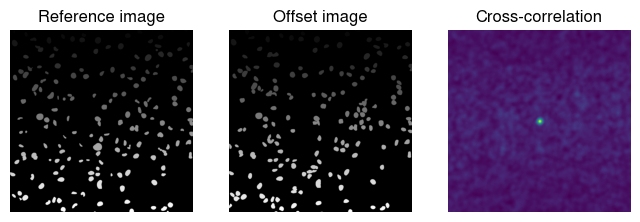

Detected pixel offset (y, x): [9. 2.]


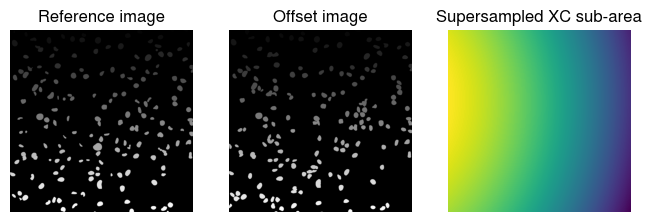

Detected subpixel offset (y, x): [8.55 1.93]


In [138]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

crop = 2000
image = dapi_reference_img[0:crop,0:crop]
shift = None #(-22.4, 13.32)
# The shift corresponds to the pixel offset relative to the reference image
# offset_image = fourier_shift(np.fft.fftn(image), shift)
offset_image = dapi_cycle_img[0:crop,0:crop] #np.fft.ifftn(offset_image)
print(f'Known offset (y, x): {shift}')


image, flows, styles = cellpose_model.eval(image,)    
offset_image, flows, styles = cellpose_model.eval(offset_image,)    
# pixel precision first
shift, error, diffphase = phase_cross_correlation(image, offset_image)

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(image, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Offset image')

# Show the output of a cross-correlation to show what the algorithm is
# doing behind the scenes
image_product = np.fft.fft2(image) * np.fft.fft2(offset_image).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Cross-correlation")

plt.show()

print(f'Detected pixel offset (y, x): {shift}')

# subpixel precision
shift, error, diffphase = phase_cross_correlation(
    image, offset_image, upsample_factor=100
)

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(image, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Offset image')

# Calculate the upsampled DFT, again to show what the algorithm is doing
# behind the scenes.  Constants correspond to calculated values in routine.
# See source code for details.
cc_image = _upsampled_dft(image_product, 150, 100, (shift * 100) + 75).conj()
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Supersampled XC sub-area")


plt.show()

print(f'Detected subpixel offset (y, x): {shift}')

In [134]:
thresh

371

In [127]:
viewer.add_image(dapi_cycle_img)
viewer.add_image(dapi_reference_img)

<Image layer 'dapi_reference_img [1]' at 0x7ff31de7cf70>